<a href="https://colab.research.google.com/github/UjalaJha/nova/blob/develop/github_anaylsis_adv_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import drive
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Mount Google Drive folder
drive.mount('/content/drive')


In [8]:

# Path to file in mounted Google Drive folder
file_path = '/content/drive/MyDrive/Grace Hopper/1k_stars_up_github_repos_data.csv'

# Read CSV file using pandas
data = pd.read_csv(file_path)
data.head()

,Repository,Repository_owner,Repository_fullname,Is_fork,Parent,Stars,Watchers,Forks,Description,Language,Topic,Open_issues,Created,Last_update
0,freeCodeCamp,freeCodeCamp,freeCodeCamp/freeCodeCamp,False,NaN,364391,8438,31658,freeCodeCamp.org's open-source codebase and cu...,TypeScript,"['careers', 'certification', 'community', 'cur...",203,2014-12-24 17:49:19,2023-04-13 13:15:46
1,free-programming-books,EbookFoundation,EbookFoundation/free-programming-books,False,NaN,275912,9647,54748,:books: Freely available programming books,NaN,"['books', 'education', 'hacktoberfest', 'list'...",39,2013-10-11 06:50:37,2023-04-13 13:15:08
2,996.ICU,996icu,996icu/996.ICU,False,NaN,265541,4271,21423,Repo for counting stars and contributing. Pres...,NaN,[],16736,2019-03-26 07:31:14,2023-04-13 12:58:46
3,coding-interview-university,jwasham,jwasham/coding-interview-university,False,NaN,254563,8563,67059,A complete computer science study plan to beco...,NaN,"['algorithm', 'algorithms', 'coding-interview'...",57,2016-06-06 02:34:12,2023-04-13 13:09:23
4,awesome,sindresorhus,sindresorhus/awesome,False,NaN,248938,7496,25393,😎 Awesome lists about all kinds of interesting...,NaN,"['awesome', 'awesome-list', 'lists', 'resource...",70,2014-07-11 13:42:37,2023-04-13 13:09:30


In [16]:
data_selected=data[["Repository","Language","Stars","Watchers","Forks"]]
data_selected=data_selected.dropna(subset=['Language'])
data_selected

,Repository,Language,Stars,Watchers,Forks
0,freeCodeCamp,TypeScript,364391,8438,31658
5,developer-roadmap,Astro,236738,6875,33634
6,public-apis,Python,235890,3829,26800
7,system-design-primer,Python,217509,6476,38671
8,react,JavaScript,205742,6634,42873
...,...,...,...,...,...
1015,k6,Go,20032,312,1050
1016,cli,Go,20010,298,1680
1017,chalk,JavaScript,20008,146,830
1018,zstd,C,20002,400,1882


In [19]:
unique_languages = data_selected['Language'].unique()
print("Languages:")
print(unique_languages)

freq = data_selected["Language"].value_counts()
print("Language frequencies:")
print(freq)

Languages:
['TypeScript' 'Astro' 'Python' 'JavaScript' 'C++' 'Shell' 'Dart' 'C'
 'Java' 'Makefile' 'Markdown' 'Go' 'C#' 'Rust' 'Vue' 'CSS'
 'Jupyter Notebook' 'PHP' 'Clojure' 'HTML' 'Vim Script' 'Nunjucks'
 'Dockerfile' 'Assembly' 'Scala' 'Ruby' 'Kotlin' 'Swift' 'Julia' 'Zig'
 'SCSS' 'Lua' 'TeX' 'Objective-C' 'V' 'Haskell' 'Roff' 'Batchfile' 'Jinja'
 'Vim script' 'Emacs Lisp' 'OCaml' 'Elixir' 'AsciiDoc']
Language frequencies:
JavaScript          206
Python              126
TypeScript          113
Go                   78
Java                 69
C++                  55
C                    30
Rust                 27
HTML                 24
Shell                24
Jupyter Notebook     18
Ruby                 17
Swift                16
C#                   14
Kotlin               12
PHP                  11
CSS                   8
Vue                   6
Vim Script            4
Objective-C           4
Clojure               4
Markdown              3
Makefile              3
SCSS              

In [22]:
le = LabelEncoder()

# fit and transform the language column
lang_encoded = le.fit_transform(data_selected['Language'])
lang_encoded

array([38,  2, 29, 29, 17, 38,  6, 17, 29, 17, 35, 29,  9,  4, 38, 29, 17,
       16, 23, 29, 24, 17, 13, 16,  6, 17, 17, 13, 17, 17, 13, 17, 29, 17,
       38,  5, 38, 32, 17,  6, 38, 17, 38, 38, 42, 17,  4, 16, 32, 38,  7,
       29, 20, 38, 28, 16, 17, 35, 29,  8, 16,  6, 14, 17,  6, 13, 29, 14,
       38, 16, 13, 17, 13, 35, 13,  6, 14, 40, 16, 17, 29, 17, 16, 17,  4,
       29,  6, 32, 16, 17,  6, 17, 38, 17, 17, 29, 16, 38,  4, 17, 17,  6,
       17, 29, 38, 29, 17, 29, 25, 29, 17, 10,  5, 17, 38, 17, 38, 38, 38,
        1, 34, 17, 17, 17, 29, 42, 17, 14, 31, 29, 13, 16, 38, 16, 17, 38,
       20, 29, 13, 17,  6, 17,  7, 38, 38, 29, 38, 29, 38, 29,  4, 13, 20,
       17, 16, 29,  7, 16, 29,  4, 29, 13,  6, 29, 31, 17,  9, 38, 32, 28,
        4, 17, 29, 17, 38, 29, 38, 17, 21, 29, 29, 21, 24, 38, 38, 17, 13,
       17,  7, 17, 29, 17, 20, 17, 36, 13, 21, 17, 17, 29, 13, 29, 38, 17,
       19, 13, 35, 13, 13, 38, 16, 31, 17,  5, 29, 38, 32, 43, 32, 17, 13,
        6, 29, 13, 42, 17

In [23]:
data_selected["Language_Encoded"] = lang_encoded

In [25]:
data_selected.head()

,Repository,Language,Stars,Watchers,Forks,Language_Encoded
0,freeCodeCamp,TypeScript,364391,8438,31658,38
5,developer-roadmap,Astro,236738,6875,33634,2
6,public-apis,Python,235890,3829,26800,29
7,system-design-primer,Python,217509,6476,38671,29
8,react,JavaScript,205742,6634,42873,17


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
github_data_scaled = scaler.fit_transform(data_selected[["Stars","Watchers","Forks","Language_Encoded"]])
type(github_data_scaled)
# statistics of scaled data
pd.DataFrame(github_data_scaled).describe()

,0,1,2,3
count,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02
mean,6.281041e-17,6.281041e-17,6.281041e-17,-7.458736e-17
std,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00
min,-6.143867e-01,-9.111141e-01,-7.925176e-01,-2.036853e+00
25%,-5.033363e-01,-5.804675e-01,-5.329746e-01,-6.275625e-01
50%,-3.276349e-01,-3.030861e-01,-2.922817e-01,-4.396571e-01
75%,8.633896e-02,1.923813e-01,1.223038e-01,6.877753e-01
max,1.173462e+01,7.520877e+00,9.563048e+00,2.003113e+00


In [30]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(github_data_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [31]:
# inertia on the fitted data
kmeans.inertia_

2237.417945588016

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

([<matplotlib.axis.XTick at 0x7f14453fc070>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

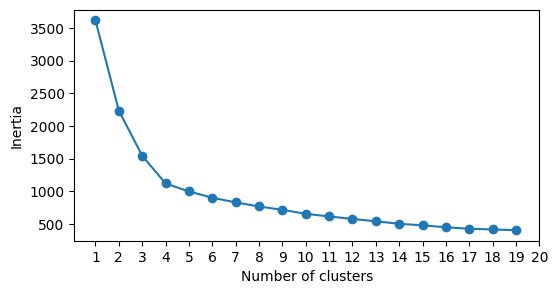

In [46]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(github_data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(6,3))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 21))

In [47]:
# k means using 4 clusters and k-means++ initialization as above elbow graph shows 4 as ideal cluster
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(github_data_scaled)
pred = kmeans.predict(github_data_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
frame = pd.DataFrame(github_data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    470
0    330
3     91
2     14
Name: cluster, dtype: int64

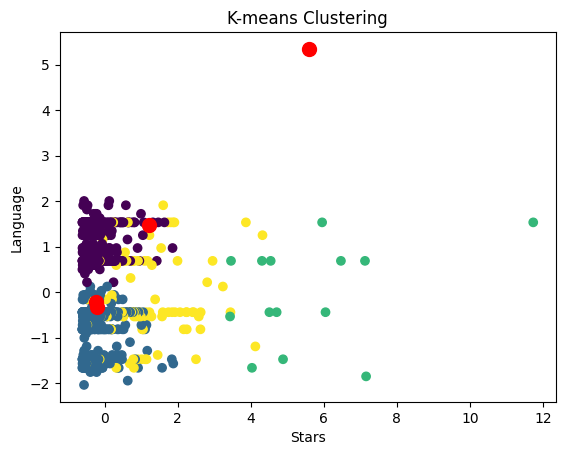

In [55]:
plt.scatter(frame.iloc[:, 0], frame.iloc[:, 3], c=pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.title('K-means Clustering')
plt.xlabel('Stars')
plt.ylabel('Language')
plt.show()

In [53]:
kmeans.cluster_centers_

array([[-0.21395921, -0.32976446, -0.2814818 ,  1.10372947],
       [-0.25263694, -0.21445969, -0.2502682 , -0.74250461],
       [ 5.59668428,  5.34238511,  4.26449792, -0.02358087],
       [ 1.21969583,  1.48159266,  1.65727559, -0.16399369]])

In [42]:
frame.head()

,0,1,2,3,cluster
0,11.734622,7.520877,2.912597,1.533350,1
1,7.157314,5.950054,3.145397,-1.848948,1
2,7.126907,2.888809,2.340259,0.687775,1
3,6.467812,5.549057,3.738823,0.687775,1
4,6.045878,5.707848,4.233875,-0.439657,1


In [79]:
unscaled_data = scaler.inverse_transform(github_data_scaled)
unscaled_df=pd.DataFrame(unscaled_data)
unscaled_df=unscaled_df.astype(int)
unscaled_df.head()

,0,1,2,3
0,364391,8438,31658,38
1,236738,6875,33634,2
2,235890,3829,26800,29
3,217509,6476,38671,29
4,205742,6634,42873,17


In [80]:
unscaled_df.iloc[:,3]

0      38
1       2
2      29
3      29
4      17
       ..
900    13
901    13
902    17
903     4
904    13
Name: 3, Length: 905, dtype: int64

In [83]:
unscaled_lang=le.inverse_transform(unscaled_df.iloc[:,3])
unscaled_df[4] = unscaled_lang
unscaled_df[5]=frame['cluster']
unscaled_df

,0,1,2,3,4,5
0,364391,8438,31658,38,TypeScript,2
1,236738,6875,33634,2,Astro,2
2,235890,3829,26800,29,Python,2
3,217509,6476,38671,29,Python,2
4,205742,6634,42873,17,JavaScript,2
...,...,...,...,...,...,...
900,20032,312,1050,13,Go,1
901,20010,298,1680,13,Go,1
902,20008,146,830,17,JavaScript,1
903,20002,400,1882,4,C,1
